In [49]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [51]:
import pandas as pd

# Cargar el archivo CSV con delimitador ';'
df = pd.read_csv("/home/user/Escritorio/MachineLearning/Practica-MachineLearning-Beatriz.Velayos/airbnb-listings-extract.csv", delimiter=';')

# Verificar la carga mostrando las primeras filas
print(df.head())

# Ver los nombres de las columnas
print(df.columns)

         ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in 

In [52]:
from sklearn.model_selection import train_test_split

total_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(total_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [53]:
# A partir de este momento cargo el dataset de train y trabajo sólo con él.
df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [54]:
df.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


Elimino las columnas que no aportan información relevante:
-Listing Url
-Scrape ID
-Last Scraped
-Thumbnail Url
-Medium Url
-Picture Url
-XL Picture Url
-Host ID
-Host Url
-Host Name
-Host Thumbnail Url
-Host Picture Url
-Host Neighbourhood
-Weekly Price
-Monthly Price
-Calendar Updated
-Calendar last Scraped
-First review
-Last review
-Reviews per Month
-Geolocation
-Host Listings Count
-Host Total Listings Count
-Calculated host listings count

In [55]:
# Hago un drop de todas las columnas que son irrelevantes
irrelevats_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

df.drop(irrelevats_columns, axis=1, inplace=True)

In [56]:
# Hago un drop de todas las columnas que tiene muy poca influencia en el modelo
weakly_relevant_columns = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]

df.drop(weakly_relevant_columns, axis=1, inplace=True)

In [57]:
# Ver el resumen de las columnas y tipos de datos
print(df.info())

# Ver estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Ver los nombres de las columnas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Experiences Offered           11824 non-null  object 
 1   Host Since                    11821 non-null  object 
 2   Host Response Time            10317 non-null  object 
 3   Host Response Rate            10317 non-null  float64
 4   Host Acceptance Rate          30 non-null     object 
 5   Host Verifications            11817 non-null  object 
 6   Street                        11824 non-null  object 
 7   Neighbourhood                 7665 non-null   object 
 8   Neighbourhood Cleansed        11824 non-null  object 
 9   Neighbourhood Group Cleansed  11006 non-null  object 
 10  City                          11820 non-null  object 
 11  State                         11705 non-null  object 
 12  Zipcode                       11426 non-null  object 
 13  M

In [58]:
df.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Street,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...","Madrid, Comunidad de Madrid 28012, Spain","Carabanchel, Madrid, Comunidad de Madrid 28025...","Madrid, Comunidad de Madrid 28012, Spain","Gaztambide, Madrid, 28 28015, Spain"
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí


In [59]:
df.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Host Since                       2044
Host Response Time                  5
Host Response Rate                 68
Host Acceptance Rate               11
Host Verifications                191
Street                           1438
Neighbourhood                     352
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       48
City                              223
State                              94
Zipcode                           536
Market                             43
Smart Location                    232
Country Code                       18
Country                            18
Latitude                        11824
Longitude                       11824
Property Type                      21
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities   

In [60]:
# Street es una variable poco útil y redundante. 
# City, State, Market y otras similares repiten información, por lo que me quedo solo con City.

df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

In [61]:
# analizo qué columnas presentan una gran cantidad de valores faltantes (NaN o null)

print(f'Cantidad total de registros en el dataframe: {df.shape[0]}')
missing_values = df.isna().sum()  # contar los valores nulos por columna
missing_values[missing_values > 0]  # mostrar solo las columnas con valores faltantes

Cantidad total de registros en el dataframe: 11824


Host Since                          3
Host Response Time               1507
Host Response Rate               1507
Host Acceptance Rate            11794
Host Verifications                  7
Neighbourhood                    4159
Neighbourhood Group Cleansed      818
City                                4
Bathrooms                          44
Bedrooms                           20
Beds                               37
Amenities                         141
Square Feet                     11350
Price                              15
Security Deposit                 6772
Cleaning Fee                     4850
Has Availability                11815
Review Scores Rating             2661
Review Scores Accuracy           2681
Review Scores Cleanliness        2676
Review Scores Checkin            2688
Review Scores Communication      2677
Review Scores Location           2691
Review Scores Value              2692
License                         11547
Jurisdiction Names              11650
Features    

In [62]:
df.columns[df.isna().any()]  #columnas que tienen NaNs

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Verifications', 'Neighbourhood',
       'Neighbourhood Group Cleansed', 'City', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Has Availability', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names', 'Features'],
      dtype='object')

In [63]:
columns_with_excessive_nulls = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df.drop(columns_with_excessive_nulls, axis=1, inplace=True)

In [64]:
# Ver el resumen de las columnas y tipos de datos
print(df.info())

# Ver estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Ver los nombres de las columnas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Experiences Offered           11824 non-null  object 
 1   Host Since                    11821 non-null  object 
 2   Host Response Time            10317 non-null  object 
 3   Host Response Rate            10317 non-null  float64
 4   Host Verifications            11817 non-null  object 
 5   Neighbourhood                 7665 non-null   object 
 6   Neighbourhood Cleansed        11824 non-null  object 
 7   Neighbourhood Group Cleansed  11006 non-null  object 
 8   City                          11820 non-null  object 
 9   Country Code                  11824 non-null  object 
 10  Latitude                      11824 non-null  float64
 11  Longitude                     11824 non-null  float64
 12  Property Type                 11824 non-null  object 
 13  R

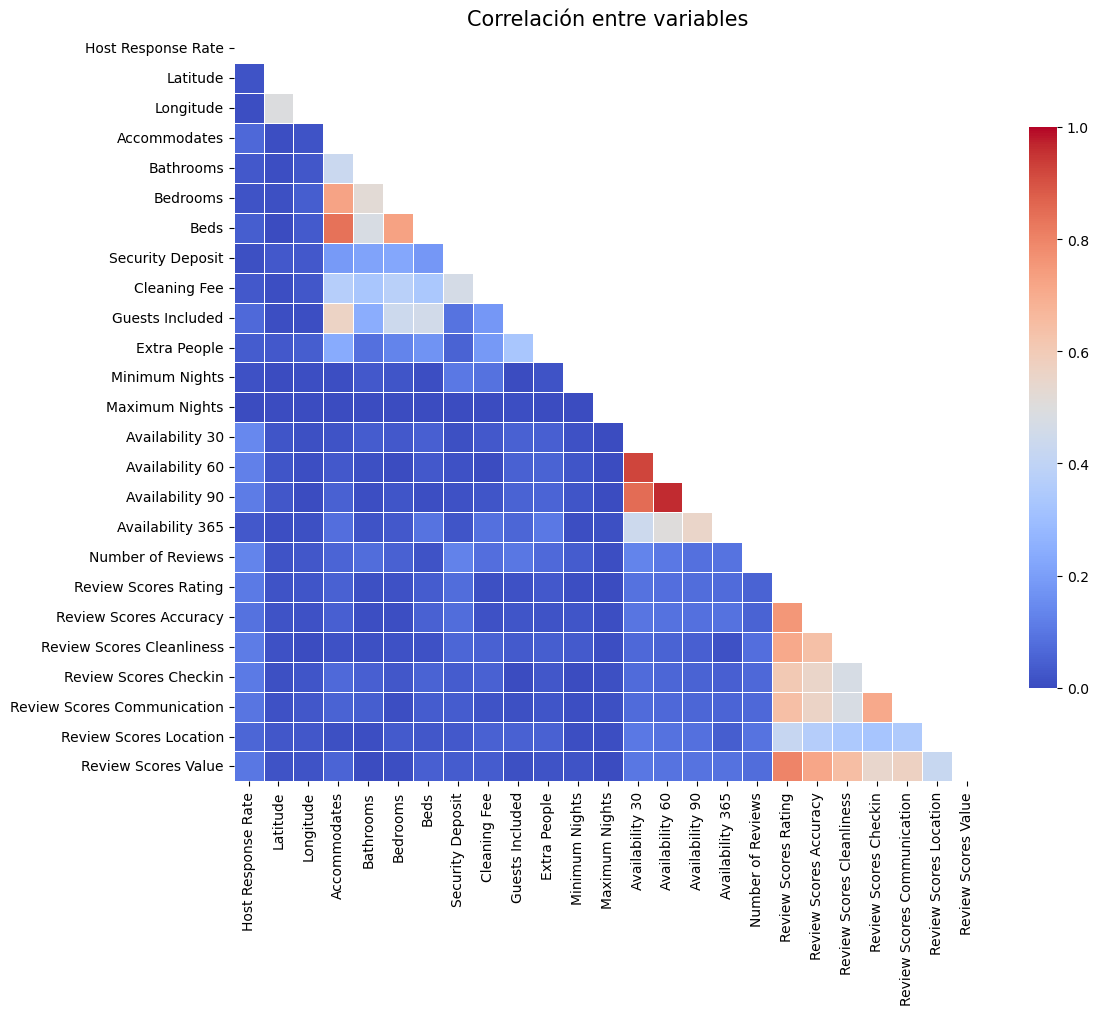

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculo la matriz de correlación 
features = df.drop(columns='Price')
correlation_matrix = features.corr(numeric_only=True).abs()

# Creo una máscara para ocultar la parte superior
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar la figura del heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask_upper,
    cmap='coolwarm',          
    vmin=0.0,
    vmax=1.0,
    center=0.5,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlación entre variables', fontsize=15)
plt.tight_layout()
plt.show()


-Se observa una alta correlación entre las variables de Availability y Reviews.
-Conservamos solo availability_365
-Calculamos la media de las variables de Reviews
-eliminamos Accommodates  por su fuerte correlación con Beds

In [66]:
# Seleccionar columnas de puntuaciones de reseñas
review_columns = [
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value"
]
reviews = df[review_columns]

# Calcular la media de las puntuaciones para cada fila
average_review_scores = reviews.mean(axis=1)
df["Average Review"] = average_review_scores

# Eliminar columnas que ya no se necesitan
columns_to_drop = [
    "Availability 30", "Availability 60", "Availability 90",
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value", "Accommodates"
]
df.drop(columns=columns_to_drop, inplace=True)


In [67]:
# Ver el resumen de las columnas y tipos de datos
print(df.info())

# Ver estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Ver los nombres de las columnas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Experiences Offered           11824 non-null  object 
 1   Host Since                    11821 non-null  object 
 2   Host Response Time            10317 non-null  object 
 3   Host Response Rate            10317 non-null  float64
 4   Host Verifications            11817 non-null  object 
 5   Neighbourhood                 7665 non-null   object 
 6   Neighbourhood Cleansed        11824 non-null  object 
 7   Neighbourhood Group Cleansed  11006 non-null  object 
 8   City                          11820 non-null  object 
 9   Country Code                  11824 non-null  object 
 10  Latitude                      11824 non-null  float64
 11  Longitude                     11824 non-null  float64
 12  Property Type                 11824 non-null  object 
 13  R

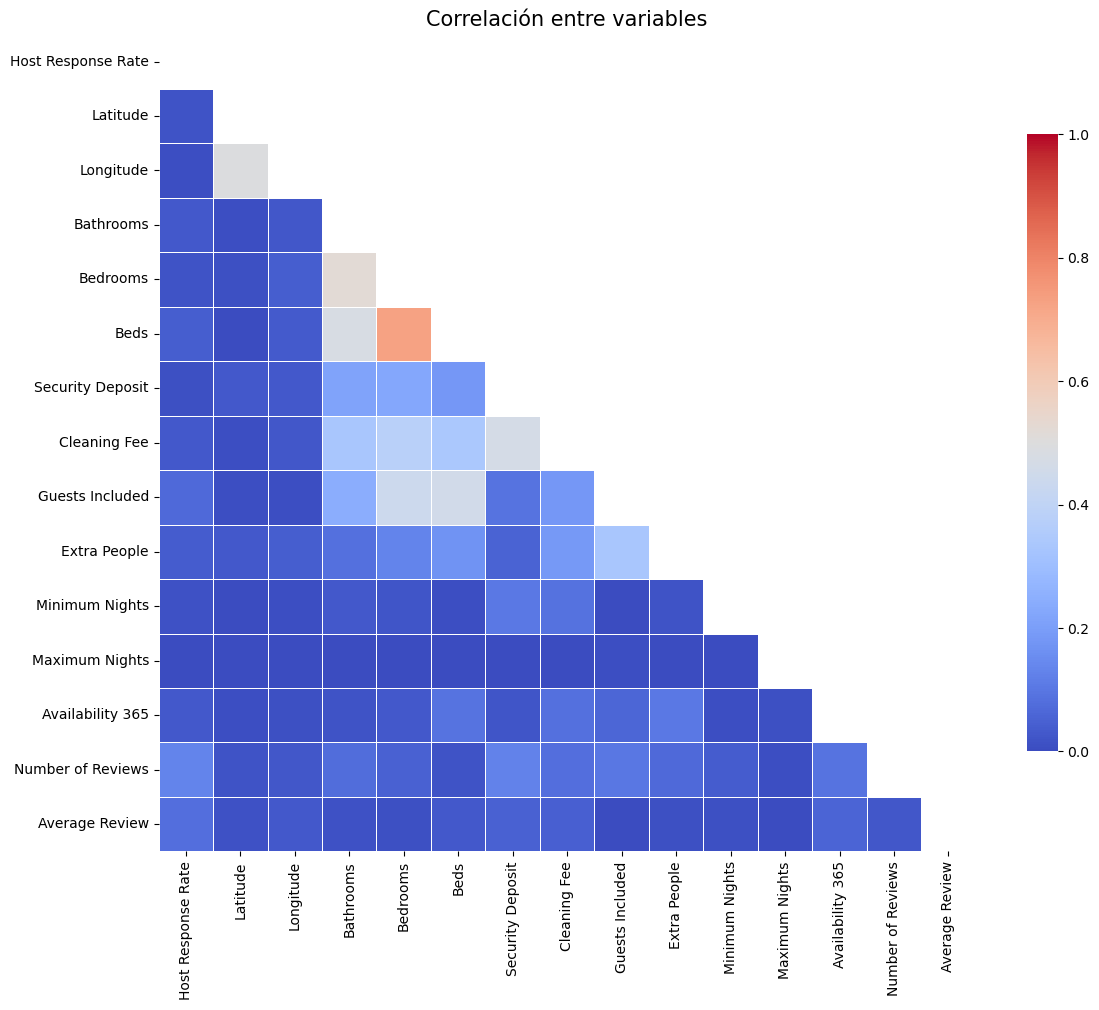

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculo la matriz de correlación 
features = df.drop(columns='Price')
correlation_matrix = features.corr(numeric_only=True).abs()

# Creo una máscara para ocultar la parte superior
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar la figura del heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask_upper,
    cmap='coolwarm',          
    vmin=0.0,
    vmax=1.0,
    center=0.5,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlación entre variables', fontsize=15)
plt.tight_layout()
plt.show()

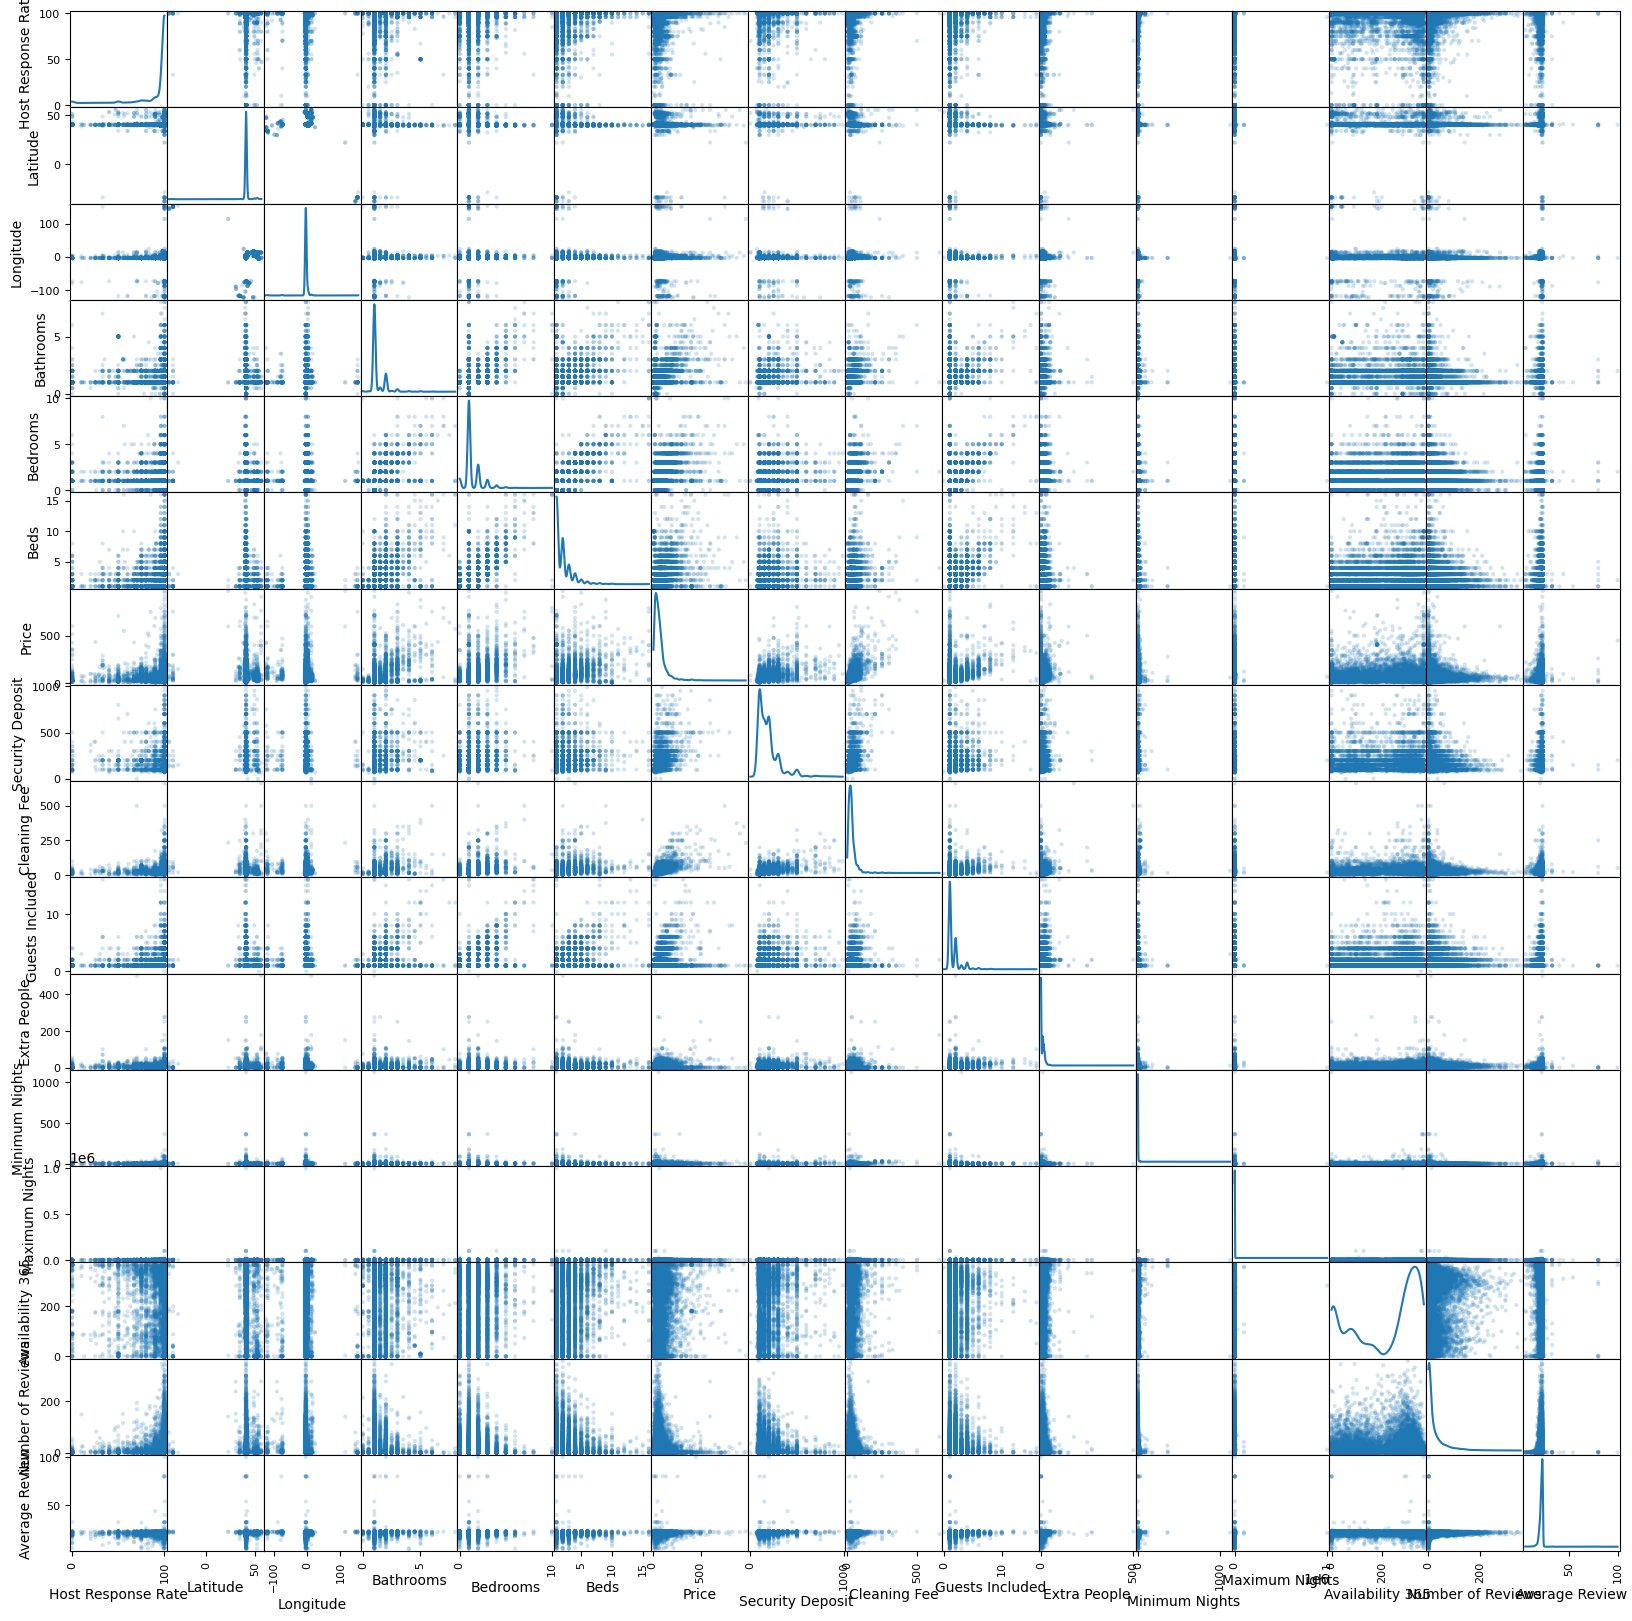

In [69]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Crear la matriz de dispersión con KDE en la diagonal
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')

# Mostrar el gráfico
plt.show()

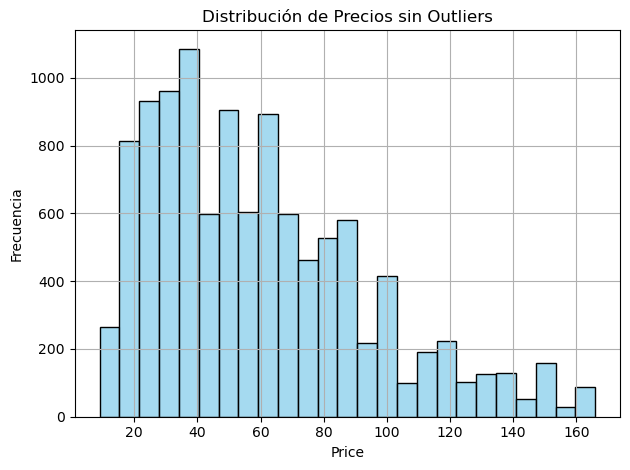

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos límites para outliers usando el método IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los datos usando query
df_filtered = df.query("@lower_bound <= Price <= @upper_bound")

# Usamos seaborn para histograma
sns.histplot(df_filtered['Price'], bins=25, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios sin Outliers')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
df = df[df['Price'] < 200]

In [72]:
df.shape

(11285, 31)

In [73]:
cols = ['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']
df[cols].isnull().sum()

Neighbourhood                   3917
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     667
dtype: int64

In [74]:
df[cols].isnull().sum().to_frame('nulos').assign(
    porcentaje=lambda x: (x['nulos'] / len(df)) * 100
)

,nulos,porcentaje
Neighbourhood,3917,34.709792
Neighbourhood Cleansed,0,0.000000
Neighbourhood Group Cleansed,667,5.910501


In [75]:
# Crear una nueva columna con la información de vecindario consolidada y sin valores nulos
# Eliminar las columnas originales usadas para construirla, dejando limpio el DataFrame

df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])
df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

In [76]:
# limpiar datos de precios en diferentes columnas
# calcular un total extra por anuncio

def parse_price(s):
    if pd.isna(s):
        return 0.0
    return float(str(s).replace("€", "").replace(",", "").replace("$", "").strip())

df["Cleaning Fee"] = df["Cleaning Fee"].apply(parse_price)
df["Security Deposit"] = df["Security Deposit"].apply(parse_price)
df["Extra People"] = df["Extra People"].apply(parse_price)

df["total_extra_cost"] = df["Cleaning Fee"] + df["Security Deposit"] + df["Extra People"]

In [77]:
import pandas as pd

# Columnas numéricas con al menos un valor igual a 0
numeric_cols = df.select_dtypes(include='number')  # Solo columnas numéricas
cols_with_zeros = numeric_cols.columns[(numeric_cols == 0).any()].tolist()

# Columnas con al menos un valor nulo (NaN o None)
cols_with_nulls = df.columns[df.isnull().any()].tolist()

# Columnas con valores NaN explícitos (equivalente en pandas)
cols_with_nans = df.columns[df.isna().any()].tolist()

# Mostrar resultados
print("Columnas con al menos un valor igual a 0:")
print(cols_with_zeros)

print("\nColumnas con valores nulos (NaN o None):")
print(cols_with_nulls)

print("\nColumnas con valores NaN:")
print(cols_with_nans)


Columnas con al menos un valor igual a 0:
['Host Response Rate', 'Bathrooms', 'Bedrooms', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Availability 365', 'Number of Reviews', 'total_extra_cost']

Columnas con valores nulos (NaN o None):
['Host Since', 'Host Response Time', 'Host Response Rate', 'Host Verifications', 'City', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Features', 'Average Review']

Columnas con valores NaN:
['Host Since', 'Host Response Time', 'Host Response Rate', 'Host Verifications', 'City', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Features', 'Average Review']


In [78]:
list(df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Host Since',
 'Host Response Time',
 'Host Verifications',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Cancellation Policy',
 'Features',
 'Final Neighbourhood']

In [79]:
df.select_dtypes(include='object').apply(lambda col: len(col.apply(lambda x: tuple(x) if isinstance(x, list) else x).unique()))

Experiences Offered       5
Host Since             2032
Host Response Time        5
Host Verifications      189
City                    193
Country Code             16
Property Type            21
Room Type                 3
Bed Type                  5
Amenities              9686
Cancellation Policy       8
Features                 84
Final Neighbourhood     253
dtype: int64

In [80]:
# Rellenar NA con la moda en columnas categóricas con pocos valores
def fillna_with_mode(df, column):
    mode_val = df[column].mode()[0]
    df[column].fillna(mode_val, inplace=True)
    print(f"Rellenada '{column}' con su moda: {mode_val}")

fillna_with_mode(df, 'Host Response Time')

# Eliminar columnas con baja utilidad informativa o dominadas por un solo valor
def drop_column_if_dominated(df, column, threshold=0.99):
    top_val_ratio = df[column].value_counts(normalize=True).iloc[0]
    if top_val_ratio > threshold:
        df.drop(column, axis=1, inplace=True)
        print(f"Eliminada columna '{column}' por dominancia: {top_val_ratio:.2%}")

drop_column_if_dominated(df, 'Experiences Offered')

# Eliminar columnas ruidosas o con demasiadas categorías irrelevantes
for col in ['City', 'Country Code']:
    print(df[col].value_counts())
    df.drop(col, axis=1, inplace=True)
    print(f"Eliminada columna '{col}'")

# Codificación de variables categóricas basada en la media del precio
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 
               'Cancellation Policy', 'Final Neighbourhood']
mean_map = {}

for col in categorical:
    mean_encoding = df.groupby(col)['Price'].mean()
    df[col] = df[col].map(mean_encoding)
    mean_map[col] = mean_encoding
    print(f"Codificada columna '{col}' con target mean encoding")

# Reordenar columnas para dejar 'Price' al inicio
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

# Rellenar valores numéricos faltantes con la media de cada columna numérica
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df.dropna(subset=['Host Since'], inplace=True)
df['Host Since'] = pd.to_datetime(df['Host Since'], format='%Y-%m-%d')
df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)
df.drop(['Host Since'], axis=1, inplace=True)

# Comprobación final
print("¿Columnas con valores nulos?\n", df.isnull().any())

Rellenada 'Host Response Time' con su moda: within an hour
Eliminada columna 'Experiences Offered' por dominancia: 99.91%
City
Madrid                                 10258
Barcelona                                206
London                                    95
Paris                                     75
Palma                                     40
Berlin                                    32
Roma                                      29
Dublin                                    28
Los Angeles                               24
New York                                  24
Brooklyn                                  21
Alcúdia                                   21
Wien                                      20
Amsterdam                                 18
Rome                                      16
Madrid, Comunidad de Madrid, ES           14
Toronto                                   12
Palma de Mallorca                         10
Inca                                       9
Chicago           

In [81]:
# Tratamiento de columnas con valores nulos restantes

# Host Verifications: contar cuántas verificaciones tiene el host
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else np.nan)
df['Host Verifications'] = df['Host Verifications'].fillna(df['Host Verifications'].mean())

# Amenities: contar la cantidad de amenities listadas
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else np.nan)
df['Amenities'] = df['Amenities'].fillna(df['Amenities'].mean())

# Features: contar cuántas características aparecen listadas
df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else np.nan)
df['Features'] = df['Features'].fillna(df['Features'].mean())

# Comprobación final
print("¿Columnas con valores nulos?\n", df.isnull().any())


¿Columnas con valores nulos?
 Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Average Review         False
Final Neighbourhood    False
total_extra_cost       False
Years Being Host       False
dtype: bool


In [82]:
df.describe()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11282 entries, 0 to 11823
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                11282 non-null  float64
 1   Host Response Time   11282 non-null  float64
 2   Host Response Rate   11282 non-null  float64
 3   Host Verifications   11282 non-null  float64
 4   Latitude             11282 non-null  float64
 5   Longitude            11282 non-null  float64
 6   Property Type        11282 non-null  float64
 7   Room Type            11282 non-null  float64
 8   Bathrooms            11282 non-null  float64
 9   Bedrooms             11282 non-null  float64
 10  Beds                 11282 non-null  float64
 11  Bed Type             11282 non-null  float64
 12  Amenities            11282 non-null  float64
 13  Security Deposit     11282 non-null  float64
 14  Cleaning Fee         11282 non-null  float64
 15  Guests Included      11282 non-null  int6

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = df.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = df.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -540.080
best parameters: {'alpha': np.float64(0.08337822234717891)}


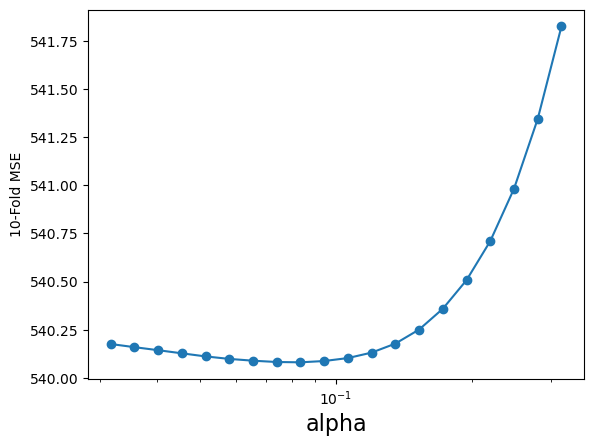

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5,-0.5,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [85]:
from datetime import datetime
import pandas as pd

# Cargar el dataset de test
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Eliminar columnas no útiles
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df_test.drop(not_useful_columns + somehow_useful_columns_but_droppable_anyway +
             columns_with_too_many_missing_values, axis=1, inplace=True)

# Otras columnas a eliminar por consistencia
df_test.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

# Crear la columna 'Average Review' como la media de las columnas de puntuaciones
review_cols = ["Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
               "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
               "Review Scores Value"]
df_test['Average Review'] = df_test[review_cols].mean(axis=1)

# Eliminar columnas originales de puntuación y otras irrelevantes
df_test.drop(review_cols + ['Availability 30', 'Availability 60', 'Availability 90', 'Accommodates'], axis=1, inplace=True)

# Filtrar precios y baños inválidos
df_test = df_test[(df_test['Price'] < 200) & (df_test['Price'] != 0)]
df_test = df_test[df_test['Bathrooms'] != 0]

# Consolidar columna de vecindario
df_test["Final Neighbourhood"] = df_test["Neighbourhood Group Cleansed"].fillna(df_test["Neighbourhood Cleansed"])
df_test.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

# Rellenar nulos y contar elementos en columnas de texto multivaluadas
df_test['Features'].fillna("", inplace=True)
df_test['Amenities'].fillna("", inplace=True)
df_test['Host Verifications'].fillna("", inplace=True)

df_test['Features'] = df_test['Features'].apply(lambda x: len(str(x).split(',')))
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(',')))
df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(',')))

# Procesar fechas de 'Host Since' (sin calcular Years Being Host)
df_test.dropna(subset=['Host Since'], inplace=True)
df_test['Host Since'] = pd.to_datetime(df_test['Host Since'], format='%Y-%m-%d')

# Imputar valor más frecuente en 'Host Response Time'
df_test["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)

# Eliminar otras columnas irrelevantes
df_test.drop(['Experiences Offered', 'City', 'Country Code'], axis=1, inplace=True)

# --- LIMPIEZA Y CÁLCULO DE total_extra_cost EN TEST ---
def parse_price(s):
    if pd.isna(s):
        return 0.0
    return float(str(s).replace("€", "").replace(",", "").replace("$", "").strip())

df_test["Cleaning Fee"] = df_test["Cleaning Fee"].apply(parse_price)
df_test["Security Deposit"] = df_test["Security Deposit"].apply(parse_price)
df_test["Extra People"] = df_test["Extra People"].apply(parse_price)

df_test["total_extra_cost"] = (
    df_test["Cleaning Fee"] + df_test["Security Deposit"] + df_test["Extra People"]
)

df_test.dropna(subset=['Host Since'], inplace=True)
df_test['Host Since'] = pd.to_datetime(df_test['Host Since'], format='%Y-%m-%d')
df_test['Years Being Host'] = df_test['Host Since'].apply(lambda x: 2017 - x.year)
df_test.drop(['Host Since'], axis=1, inplace=True)

# Codificar variables categóricas usando el mapeo de medias obtenido del train
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'Final Neighbourhood']
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

# Reordenar 'Price' al inicio
cols = df_test.columns.tolist()
if 'Price' in cols:
    cols.insert(0, cols.pop(cols.index('Price')))
    df_test = df_test[cols]

# Rellenar NaNs en categóricas transformadas
df_test[categorical] = df_test[categorical].fillna(0)

# Rellenar NaNs numéricos con la media del train
df_test.fillna(df.mean(numeric_only=True), inplace=True)

# Verificación final
print("Forma final df:", df.shape)
print("Forma final df_test:", df_test.shape)
print("Columnas distintas entre df y df_test:", set(df.columns) ^ set(df_test.columns))

Forma final df: (11282, 27)
Forma final df_test: (2807, 27)
Columnas distintas entre df y df_test: set()


In [86]:
# Comprobamos que no quedan valores no numéricos
print(df[categorical].dtypes)

# Comprobamos que no hay valores nulos en las variables categóricas del conjunto de test
print(df_test[categorical].isnull().sum())

Host Response Time     float64
Property Type          float64
Room Type              float64
Bed Type               float64
Cancellation Policy    float64
Final Neighbourhood    float64
dtype: object
Host Response Time     0
Property Type          0
Room Type              0
Bed Type               0
Cancellation Policy    0
Final Neighbourhood    0
dtype: int64


In [87]:
df_test.describe()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2807 entries, 0 to 2955
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2807 non-null   float64
 1   Host Response Time   2807 non-null   float64
 2   Host Response Rate   2807 non-null   float64
 3   Host Verifications   2807 non-null   int64  
 4   Latitude             2807 non-null   float64
 5   Longitude            2807 non-null   float64
 6   Property Type        2807 non-null   float64
 7   Room Type            2807 non-null   float64
 8   Bathrooms            2807 non-null   float64
 9   Bedrooms             2807 non-null   float64
 10  Beds                 2807 non-null   float64
 11  Bed Type             2807 non-null   float64
 12  Amenities            2807 non-null   int64  
 13  Security Deposit     2807 non-null   float64
 14  Cleaning Fee         2807 non-null   float64
 15  Guests Included      2807 non-null   int64 

In [88]:
cols = df_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_test = df_test[cols]

df_test.fillna(df.mean(), inplace=True)

print(df.shape, df_test.shape)

(11282, 27) (2807, 27)


In [89]:
data_test = df_test.values

y_test = data_test[:,0:1]     # me quedo con la 1ª columna, price
X_test = data_test[:,1:]      # me quedo con el resto

feature_names_test = df_test.columns[1:]

# normalización/escalado realizada con el scaler anterior, basado en los datos de training
XtestScaled = scaler.transform(X_test) 

In [90]:
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 537.29
MSE Modelo Lasso (test) : 576.48
Host Response Time -0.0
Host Response Rate -1.366904480025861
Host Verifications -1.1262433712851854
Latitude -0.908013783053463
Longitude -0.9661928078509388
Property Type 0.0
Room Type 15.304960431828794
Bathrooms 2.31119917483373
Bedrooms 7.923315296555505
Beds 1.8605428405843987
Bed Type 0.5864878408283202
Amenities 2.337950168360273
Security Deposit 1.7154582601605726
Cleaning Fee 4.054432193019646
Guests Included 2.947491086901039
Extra People -0.5796895167812196
Minimum Nights -0.5008915455374001
Maximum Nights -0.0
Availability 365 1.7154842874481382
Number of Reviews -3.5765243072727277
Cancellation Policy -0.9763128868305488
Features 0.8021761924070161
Average Review 1.371098240093819
Final Neighbourhood 10.169428931912256
total_extra_cost 0.0
Years Being Host 0.9205268708753155


Interpretación de los resultados: 
-El modelo tiene un rendimiento similar en los conjuntos de entrenamiento y prueba, lo cual sugiere que no está sobreajustado.
-El error es moderadamente bajo (depende de la escala del target, en este caso el precio), por lo que parece un modelo razonablemente bueno.
-La pequeña diferencia entre ambos MSE puede interpretarse como una buena generalización.

In [91]:
# Sencillo de implementar y rápido de entrenar
# Es un modelo lineal, lo que significa que puedes interpretar los coeficientes fácilmente
# Regulariza los coeficientes grandes (L2)lo que lo hace más estable ante multicolinealidad
# A diferencia de Lasso no fuerza coeficientes a cero

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(XtrainScaled, y_train)

ridge = Ridge(alpha=ridge_grid.best_params_['alpha']).fit(XtrainScaled, y_train)
y_pred = ridge.predict(XtestScaled)

print("MSE (Ridge):", mean_squared_error(y_test, y_pred))

MSE (Ridge): 575.0365732400321


Interpretación de estos resultados: 
-Rendimiento similar entre Ridge y Lasso.
-Ridge obtiene un ligeramente menor MSE en test (575.04 vs 576.48), lo cual sugiere que está generalizando un poco mejor.
-Si además de rendimiento interesa la estabilidad de los coeficientes entonces Ridge es una mejor opción.

MSE Random Forest (train): 268.60172
MSE Random Forest (test) : 430.07463
Room Type: 0.4777
Bathrooms: 0.1735
Final Neighbourhood: 0.1031
Bedrooms: 0.0325
Cleaning Fee: 0.0303
Latitude: 0.0271
Availability 365: 0.0205
Longitude: 0.0144
total_extra_cost: 0.0136
Number of Reviews: 0.0135
Amenities: 0.0129
Average Review: 0.0116
Beds: 0.0112
Extra People: 0.0096
Guests Included: 0.0083
Host Response Rate: 0.0075
Minimum Nights: 0.0055
Years Being Host: 0.0054
Host Verifications: 0.0046
Maximum Nights: 0.0033
Property Type: 0.0032
Features: 0.0032
Security Deposit: 0.0027
Cancellation Policy: 0.0025
Host Response Time: 0.0022
Bed Type: 0.0001


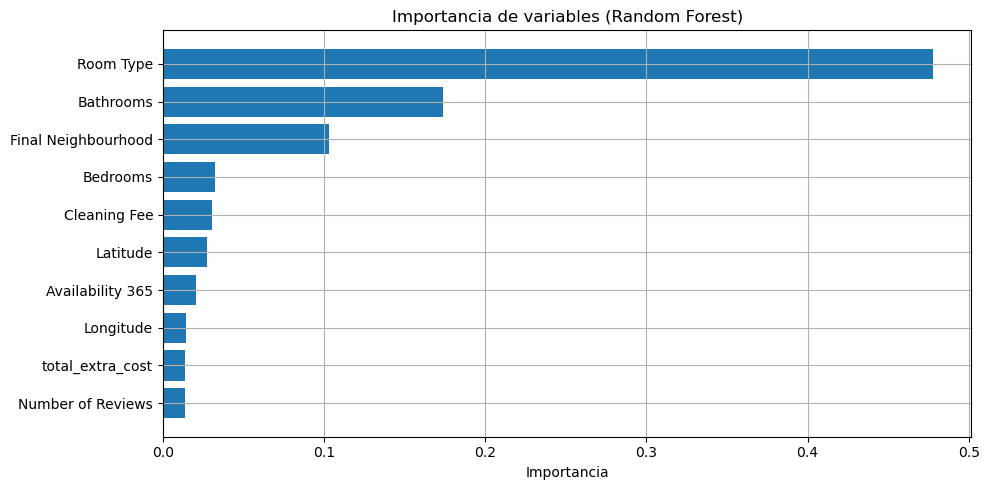

In [92]:
# Random Forest generalmente ofrece una muy buena precisión en tareas de predicción porque combina muchos árboles de decisión.
# A diferencia de modelos lineales como Lasso o regresión lineal Random Forest puede capturar:
# Relaciones no lineales entre las variables.
# Interacciones complejas entre características.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Entrenamiento del modelo
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(XtrainScaled, y_train)

# Predicciones
ytrainRF = rf.predict(XtrainScaled)
ytestRF = rf.predict(XtestScaled)

# Métricas
mseTrainRF = mean_squared_error(y_train, ytrainRF)
mseTestRF = mean_squared_error(y_test, ytestRF)

print('MSE Random Forest (train): %.5f' % mseTrainRF)
print('MSE Random Forest (test) : %.5f' % mseTestRF)

# Importancia de las variables
importances = rf.feature_importances_
for f, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")

# Gráfico de importancia de variables (top 10)
top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]
labels, scores = zip(*top_features)

plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], scores[::-1])
plt.xlabel("Importancia")
plt.title("Importancia de variables (Random Forest)")
plt.grid()
plt.tight_layout()
plt.show()

Interpretación de los resultados:
-El Random Forest tiene un menor error en entrenamiento y test, lo que indica que captura mejor patrones complejos que Lasso.
-La diferencia entre el MSE de entrenamiento y test en RF es más pronunciada, esto quiere decir que puede estar empezando a sobreajustar, pero no gravemente.
-En general, Random Forest predice mejor que Lasso en este caso.

R² Lasso:         0.5914
R² Ridge:         0.5924
R² Random Forest: 0.6951


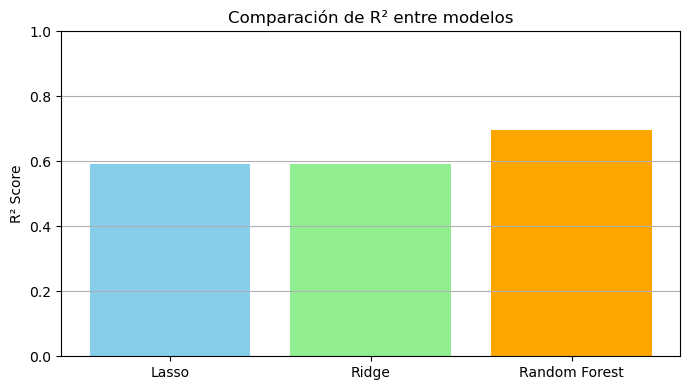

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predicciones
y_pred_lasso = lasso.predict(XtestScaled)
y_pred_ridge = ridge.predict(XtestScaled)
y_pred_rf    = rf.predict(XtestScaled)

# R² Score
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_rf    = r2_score(y_test, y_pred_rf)

# Mostrar resultados
print(f"R² Lasso:         {r2_lasso:.4f}")
print(f"R² Ridge:         {r2_ridge:.4f}")
print(f"R² Random Forest: {r2_rf:.4f}")

model_names = ['Lasso', 'Ridge', 'Random Forest']
r2_scores = [r2_lasso, r2_ridge, r2_rf]

plt.figure(figsize=(7, 4))
plt.bar(model_names, r2_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.title("Comparación de R² entre modelos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Conclusión:
-Lasso y Ridge explican aproximadamente el 59% del precio del alojamiento. 
-Son modelos lineales, útiles cuando  se quiere entender qué variables afectan más al precio.
-Random Forest explica casi el 70% del precio. Es un modelo más complejo, que detecta mejor las relaciones no lineales entre variables.
-Random Forest es el mejor modelo para predecir el precio del alojamiento porque da mejores resultados que Lasso y Ridge.